# Detroit Open Demolitions 
### Public X Design Workshop, Detroit Sep, 2018 
#### We are Avigail Vantu (avigailvantu@gmail.com) & Eitan Akman (eitanakman@gmail.com), we are both cities, tech and data enthusiastic based in Brookyln, NY and are very excited to be visting Detroit. 

Hey there! Welcome to our workshop. You can be a Detroit resident or a visitor to participate, no prior technical knowledge is needed to participate. Today we want to use data to better understand Detroit's demolitions policies. All of the data we will be working on in these session is released as open data - meaning it is accessible online for everyone to use. In particular, Detroit's Open Data Portal was used in this notebook descriptives and analysis: https://data.detroitmi.gov/ 

iPython notebook in a nuteshell: 
- input and output 
- running a cell shift + returen 
- 

### To get a better understanding of our topic and the magntute of the issue, here is the distribution of demolitions in Detroit by Neighborhood 2014 - 2018

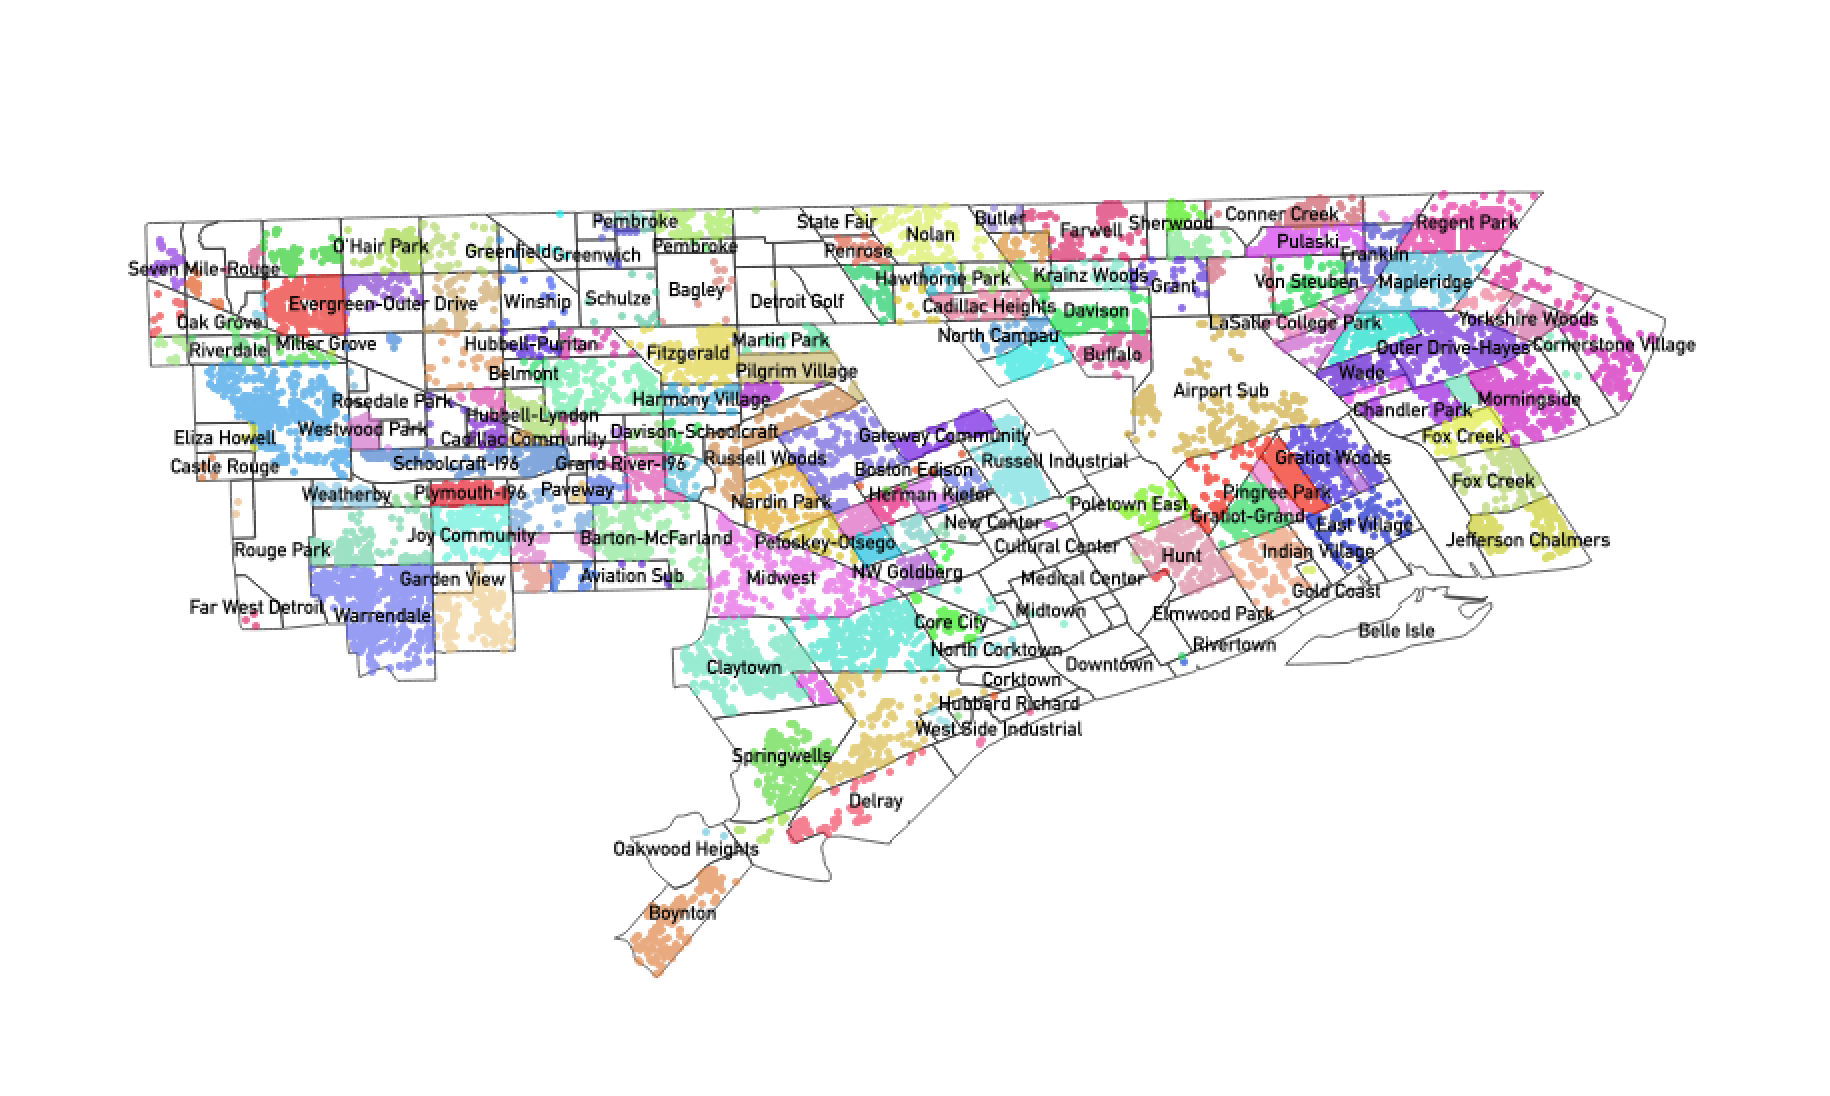

In [1]:
from IPython.display import Image
Image(filename='TotalDemoPerNighDetroit.png')


In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

### Read datasets

In [3]:
#det_prob = pd.read_csv('Improve_Detroit_Issues.csv')
detmolitions = pd.read_csv('Detroit_Demolitions.csv')
# crime16 = pd.read_csv('DPD__All_Crime_Incidents__December_6__2016_-_Present.csv')
# crimeOld = pd.read_csv('DPD__All_Crime_Incidents__January_1__2009_-_December_6__2016.csv')

In [4]:
len(detmolitions)

14524

### Data Cleaning 

In [5]:
# remove NaN's 
#new_det.dropna()

In [6]:
# remove NaN's  

detmolitions.dropna()

,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Neighborhood,Latitude,Longitude,Location
0,6754 W Fort,18000464.,Smalley,23800.00,Non-HHF,07/19/2018,No,6,Delray,42.304381,-83.109600,"location\n(42.304381, -83.1096)"
1,5528 Martin,18011033.,Smalley,18500.00,Non-HHF,07/11/2018,No,6,Claytown,42.338227,-83.132268,"location\n(42.338227, -83.132268)"
2,4462 33rd St,16012357.,DMC Consultants,17850.00,Non-HHF,07/23/2018,No,6,Chadsey Condon,42.336451,-83.114124,"location\n(42.336451, -83.114124)"
3,3100 E Seven Mile,13008335-9,Den-Man Contractors,54650.00,Non-HHF,04/30/2018,Yes,3,Conant Gardens,42.432757,-83.070501,"location\n(42.432757, -83.070501)"
4,26181 W Outer Drive,20018839.,DMC Consultants,14890.00,Non-HHF,04/17/2018,No,6,Boynton,42.259794,-83.165767,"location\n(42.259794, -83.165767)"
5,8218 Edgewood,17001774.,Gayanga Co,10900.00,Non-HHF,04/05/2018,No,3,Airport Sub,42.397151,-83.018679,"location\n(42.397151, -83.018679)"
6,18656 Concord,15011139.,Gayanga Co,13000.00,Non-HHF,03/29/2018,No,3,Grant,42.431061,-83.032382,"location\n(42.431061, -83.032382)"
7,19140 Rogge,15006493.,Gayanga Co,15100.00,Non-HHF,03/29/2018,No,3,Nortown,42.434496,-83.029394,"location\n(42.434496, -83.029394)"
8,13927 Sussex,22046847.,Gayanga Co,14225.00,Non-HHF,02/19/2018,No,1,Cadillac Community,42.387598,-83.195360,"location\n(42.387598, -83.19536)"
9,1075 Coplin,21051808-11,Homrich,183000.00,Non-HHF,07/12/2018,Yes,4,Riverbend,42.371929,-82.950271,"location\n(42.371929, -82.950271)"


In [7]:
#crime16.dropna()

In [8]:
#crimeOld.dropna()

### Demolitions cost 

In [9]:
print ("The total price of demolitions in US dollar is" , detmolitions['Price'].sum())

The total price of demolitions in US dollar is 228312012.43


In [10]:
detmolitions.head()

,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Neighborhood,Latitude,Longitude,Location
0,6754 W Fort,18000464.,Smalley,23800.0,Non-HHF,07/19/2018,No,6,Delray,42.304381,-83.109600,"location\n(42.304381, -83.1096)"
1,5528 Martin,18011033.,Smalley,18500.0,Non-HHF,07/11/2018,No,6,Claytown,42.338227,-83.132268,"location\n(42.338227, -83.132268)"
2,4462 33rd St,16012357.,DMC Consultants,17850.0,Non-HHF,07/23/2018,No,6,Chadsey Condon,42.336451,-83.114124,"location\n(42.336451, -83.114124)"
3,3100 E Seven Mile,13008335-9,Den-Man Contractors,54650.0,Non-HHF,04/30/2018,Yes,3,Conant Gardens,42.432757,-83.070501,"location\n(42.432757, -83.070501)"
4,26181 W Outer Drive,20018839.,DMC Consultants,14890.0,Non-HHF,04/17/2018,No,6,Boynton,42.259794,-83.165767,"location\n(42.259794, -83.165767)"


In [11]:
#  (detmolitions[detmolitions['Neighborhood'] == 'Claytown']).groupby(['Price']).sum()

dem = detmolitions.groupby(['Neighborhood']).sum()

### dem is a DF with USD spent on demolitions by neighborhood 

In [12]:
dem.head()

,Price,Council_District,Latitude,Longitude
Neighborhood,,,,
Airport Sub,3942161.75,714,9242.481514,-18099.234705
Aviation Sub,64718.40,28,169.423262,-332.650528
Bagley,167511.00,20,424.264473,-831.466834
Barton-McFarland,3174172.63,1340,8133.953885,-15967.729907
Belmont,105975.52,8,339.250492,-665.528861


In [13]:



 #data.groupby(['col1', 'col2']).mean()
del dem['Council_District']
del dem['Latitude']
del dem['Longitude']


dem.head()

,Price
Neighborhood,
Airport Sub,3942161.75
Aviation Sub,64718.40
Bagley,167511.00
Barton-McFarland,3174172.63
Belmont,105975.52


In [14]:
#dem.drop(['Council_District', 'Latitude', 'Longitude'], axis=1)


In [15]:
dem['Neighborhood'] = dem.index

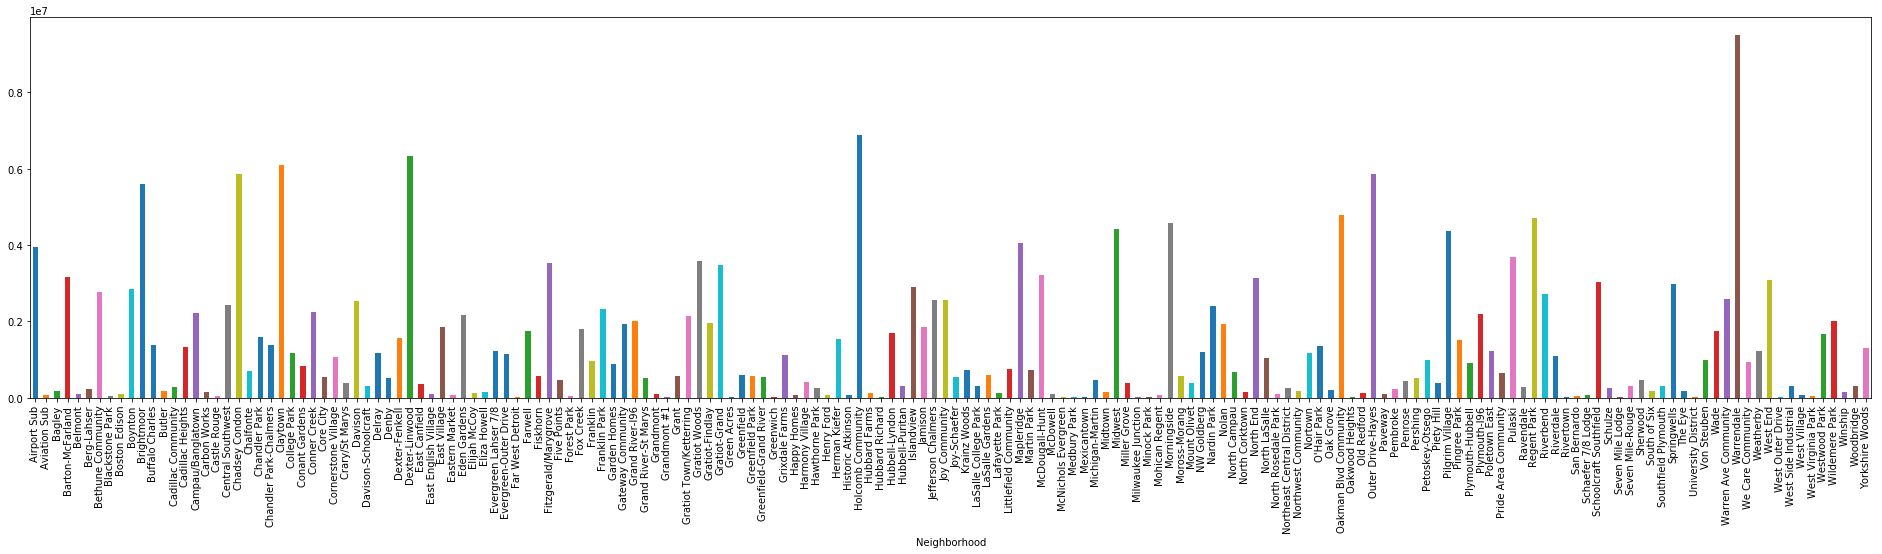

In [16]:
plt.figure(figsize=(33,7))
dem['Price'].plot.bar(stacked=False)

plt.show()

In [17]:
detmolitions['Primary_Funding_Source'] =  detmolitions['Primary Funding Source']

In [18]:
# seperate df : nonUHF and UHF funds
nonUHFdem = (detmolitions[detmolitions['Primary_Funding_Source']== 'Non-HHF'])
UHFdem = (detmolitions[detmolitions['Primary_Funding_Source']== 'HHF'])                     
print (len(nonUHFdem))
print (len(UHFdem))
print (len(detmolitions))
#(comp[comp['BoroughID']== 1])

3918
10606
14524


In [19]:
#nonUHFdem.head(3)

In [20]:
#UHFdem.head(3)

In [21]:
# grouop.by contracor name for NHF and nonNHF funded 
nonUHFdem = nonUHFdem.groupby(['Contractor Name']).sum()
UHFdem = UHFdem.groupby(['Contractor Name']).sum()

In [22]:
# remove columns , only keep price 
del nonUHFdem['Council_District']
del nonUHFdem['Latitude']
del nonUHFdem['Longitude']


del UHFdem['Council_District']
del UHFdem['Latitude']
del UHFdem['Longitude']


In [23]:
print (nonUHFdem.head(10))
print (UHFdem.head(4))

                                        Price
Contractor Name                              
1 Way Service                      3189257.00
313 Construction, LLC                38817.77
ABC Demolition                      329395.00
Able Demolition                    9371192.70
Adamo Group, Inc.                 12295740.33
BBEK Environmental                   10000.00
Blackstar                            15400.00
Blue Star                          3076100.00
Brown & Glo Wrecking                212847.00
Brown Environmental Construction   2583315.90
                             Price
Contractor Name                   
313 Construction, LLC    464818.61
ABC Demolition          5197899.00
Able Demolition        13512933.68
Adamo Group, Inc.      40280635.38


In [24]:
nonUHFdem['PriceNonUHF'] = nonUHFdem['Price']
UHFdem['PriceUHF'] = UHFdem['Price']

In [25]:
print (nonUHFdem.head(10))
print (UHFdem.head(4))

                                        Price  PriceNonUHF
Contractor Name                                           
1 Way Service                      3189257.00   3189257.00
313 Construction, LLC                38817.77     38817.77
ABC Demolition                      329395.00    329395.00
Able Demolition                    9371192.70   9371192.70
Adamo Group, Inc.                 12295740.33  12295740.33
BBEK Environmental                   10000.00     10000.00
Blackstar                            15400.00     15400.00
Blue Star                          3076100.00   3076100.00
Brown & Glo Wrecking                212847.00    212847.00
Brown Environmental Construction   2583315.90   2583315.90
                             Price     PriceUHF
Contractor Name                                
313 Construction, LLC    464818.61    464818.61
ABC Demolition          5197899.00   5197899.00
Able Demolition        13512933.68  13512933.68
Adamo Group, Inc.      40280635.38  40280635.38


In [26]:
#index to column 
nonUHFdem['Contractor_Name'] = nonUHFdem.index
UHFdem['Contractor_Name'] = UHFdem.index

In [27]:
demUHF_merged = pd.merge(nonUHFdem, UHFdem , on = 'Contractor_Name', how = "inner")

In [29]:
del demUHF_merged['Price_x']
del demUHF_merged['Price_y']

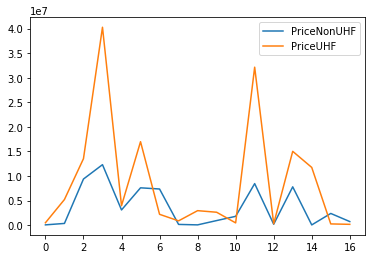

In [34]:

demUHF_merged.plot()


## Group by Neighborhood

In [160]:
crimeOldgrouped = crimeOld.groupby('NEIGHBORHOOD').count()



In [161]:
len(crimeOldgrouped)

158

In [162]:
crimeOldgrouped.head(2)

,ROWNUM,CASEID,CRIMEID,CRNO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,CENSUSTRACT,LOCATION
NEIGHBORHOOD,,,,,,,,,,,,,,
ARDEN PARK/EAST BOSTON,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,2077,575,2077
ATKINSON-EUCLID,2656,2656,2656,2656,2656,2656,2656,2656,2656,2655,2655,2655,2516,2656


In [114]:
#demolitions
detmolitionsgrouped = detmolitions.groupby('Neighborhood').count()


In [65]:
len(detmolitions)

172

In [121]:
detmolitions.head(2)

,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Neighborhood,Latitude,Longitude,Location
0,6754 W Fort,18000464.,Smalley,23800.0,Non-HHF,07/19/2018,No,6,Delray,42.304381,-83.109600,"location\n(42.304381, -83.1096)"
1,5528 Martin,18011033.,Smalley,18500.0,Non-HHF,07/11/2018,No,6,Claytown,42.338227,-83.132268,"location\n(42.338227, -83.132268)"


In [123]:

#311 data
new_det1 = new_det.groupby('Neighborhood').count()


In [124]:
len(new_det1)

206

In [125]:
new_det1.head(2)

,Ticket ID,Ticket Status,Issue Type,Issue Description,Created At,Acknowledged At,Closed At,Reopened At,Updated At,Days to Close,Report Method,Priority Code,Canonical Issue Id,Web Link,Address,Council District,Location,latitude,longitude,Creation_year
Neighborhood,,,,,,,,,,,,,,,,,,,,
Airport Sub,248,248,248,188,248,235,212,9,248,212,248,248,8,248,248,245,248,248,248,248
Arden Park,12,12,12,10,12,12,8,1,12,8,12,12,0,12,12,12,12,12,12,12


In [140]:


new_crime16_1 = crime16.groupby('Neighborhood').count()



In [163]:
crimeOldgrouped.sort_values(by='CASEID', ascending=False)

,ROWNUM,CASEID,CRIMEID,CRNO,CATEGORY,OFFENSEDESCRIPTION,STATEOFFENSEFILECLASS,INCIDENTDATE,HOUR,SCA,PRECINCT,COUNCIL,CENSUSTRACT,LOCATION
NEIGHBORHOOD,,,,,,,,,,,,,,
STATE FAIR-NOLAN,41593,41593,41593,41593,41593,41593,41593,41593,41593,41514,41514,39130,37156,41593
BURBANK,36441,36441,36441,36441,36441,36440,36440,36441,36441,36311,36311,36033,34789,36441
GREENFIELD,35605,35605,35605,35605,35605,35601,35601,35605,35605,35604,35604,35391,35584,35605
WARRENDALE,33048,33048,33048,33048,33048,33048,33048,33048,33048,33047,33047,32631,33037,33048
DENBY,32307,32307,32307,32307,32307,32307,32307,32307,32307,32306,32306,31945,32296,32307
CITY AIRPORT,30149,30149,30149,30149,30149,30149,30149,30149,30149,30148,30148,28867,20679,30149
PERSHING,29544,29544,29544,29544,29544,29542,29542,29544,29544,29496,29496,29544,29535,29544
CLAYTOWN,27469,27469,27469,27469,27469,27466,27466,27469,27469,27469,27469,27441,27038,27469
HARMONY VILLAGE,27373,27373,27373,27373,27373,27370,27370,27373,27373,27373,27373,27245,27364,27373


In [127]:
#sorting 311 data
new_det1.sort_values(by='Ticket Status', ascending=False)

,Ticket ID,Ticket Status,Issue Type,Issue Description,Created At,Acknowledged At,Closed At,Reopened At,Updated At,Days to Close,Report Method,Priority Code,Canonical Issue Id,Web Link,Address,Council District,Location,latitude,longitude,Creation_year
Neighborhood,,,,,,,,,,,,,,,,,,,,
Warrendale,2505,2505,2505,2339,2505,2409,2231,14,2505,2231,2505,2505,66,2505,2505,2505,2505,2505,2505,2505
Riverbend,590,590,590,349,590,570,508,5,590,508,590,590,24,590,590,590,590,590,590,590
Downtown,566,566,566,416,566,527,436,11,566,436,566,566,18,566,566,566,566,566,566,566
Claytown,522,522,522,411,522,485,429,2,522,429,522,522,20,522,522,522,522,522,522,522
Morningside,459,459,459,357,459,434,360,6,459,360,459,459,32,459,459,459,459,459,459,459
Central Southwest,427,427,427,319,427,410,363,9,427,363,427,427,11,427,427,427,427,427,427,427
Midwest,422,422,422,289,422,396,365,8,422,365,422,422,10,422,422,422,422,422,422,422
Dexter-Linwood,415,415,415,322,415,372,310,7,415,310,415,415,31,415,415,415,415,415,415,415
Cornerstone Village,413,413,413,342,413,389,355,14,413,355,413,413,10,413,413,413,413,413,413,413


In [128]:
#sorting demolitions
detmolitionsgrouped.sort_values(by='Address', ascending=False)

,Address,Parcel ID,Contractor Name,Price,Primary Funding Source,Demolition Date,Commercial Building,Council_District,Latitude,Longitude,Location
Neighborhood,,,,,,,,,,,
Warrendale,653,653,653,653,653,653,653,653,653,653,653
Holcomb Community,485,485,485,485,485,485,485,485,485,485,485
Brightmoor,437,437,437,437,437,437,437,437,437,437,437
Claytown,415,415,415,415,415,415,415,415,415,415,415
Outer Drive-Hayes,395,395,395,395,395,395,395,395,395,395,395
Regent Park,344,344,344,344,344,344,344,344,344,344,344
Pilgrim Village,330,330,330,330,330,330,330,330,330,330,330
Chadsey Condon,323,323,323,323,323,323,323,323,323,323,323
Morningside,315,315,315,315,315,315,315,315,315,315,315


In [130]:
detmolitionsgrouped1 = detmolitionsgrouped['Address']

In [145]:
#index to column
detmolitionsgrouped['Neighborhood'] = detmolitionsgrouped.index

In [135]:
detmolitionsgrouped1.head()


Neighborhood
Airport Sub         218
Aviation Sub          4
Bagley               10
Barton-McFarland    192
Belmont               8
Name: Address, dtype: int64

In [165]:
crimeOldgrouped = crimeOldgrouped['ROWNUM'] 

In [166]:

crimeOldgrouped['Neighborhood'] = crimeOldgrouped.index

/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [167]:
crimeOldgrouped.to_csv('crimeOldgrouped.csv')

In [169]:
len(crimeOldgrouped)

159

In [143]:
new_crime16_1.head(2)

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Scout Car Area,Precinct Number,Census Block GEOID,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Airport Sub,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415,...,1415,1415,1415,1401,1,1415,1415,1415,1415,1415
Arden Park,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,0,41,41,41,41,41


In [144]:

new_crime16_1.sort_values(by='Crime ID', ascending=False)

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Scout Car Area,Precinct Number,Census Block GEOID,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Warrendale,3822,3822,3822,3822,3822,3822,3822,3822,3822,3822,...,3822,3822,3822,3822,1,3822,3822,3822,3822,3822
Downtown,3031,3031,3031,3031,3031,3031,3031,3031,3031,3031,...,3031,3031,3031,3023,1,3031,3031,3031,3031,3031
Franklin Park,2444,2444,2444,2444,2444,2444,2444,2444,2444,2444,...,2444,2444,2444,2444,3,2444,2444,2444,2444,2444
Midtown,2314,2314,2314,2314,2314,2314,2314,2314,2314,2314,...,2314,2314,2314,2314,0,2314,2314,2314,2314,2314
Regent Park,2105,2105,2105,2105,2105,2105,2105,2105,2105,2105,...,2105,2105,2105,2085,1,2105,2105,2105,2105,2105
Barton-McFarland,2084,2084,2084,2084,2084,2084,2084,2084,2084,2084,...,2084,2084,2084,2072,1,2084,2084,2084,2084,2084
Cornerstone Village,1944,1944,1944,1944,1944,1944,1944,1944,1944,1944,...,1944,1944,1944,1923,1,1944,1944,1944,1944,1944
Claytown,1940,1940,1940,1940,1940,1940,1940,1940,1940,1940,...,1940,1940,1940,1940,1,1940,1940,1940,1940,1940
Dexter-Linwood,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1896,0,1906,1906,1906,1906,1906


In [149]:
new_crime16_1 = new_crime16_1['Crime ID'] 

In [150]:
new_crime16_1['Neighborhood'] = new_crime16_1.index

/Users/avigailvantu/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [155]:
new_crime16_1.to_csv('new_crime16_groupes.csv')

In [137]:
# export number of dmolitions per nighborhood to csv
detmolitionsgrouped1.to_csv('detmolitionsgrouped1.csv')

## curate 311 data to fix the coordinate format 

In [81]:
# remove first charc
det_prob['Location'] = det_prob['Location'].map(lambda x: str(x)[10:])

In [82]:
# remove last charc
det_prob['Location']  = det_prob['Location'] .map(lambda x: str(x)[:-1])

In [85]:
det_prob['Location'].head(2)

0    42.4011106, -83.2193318
1    42.3537337, -83.0653546
Name: Location, dtype: object

In [86]:
lat = []
lon = []

# For each row in a varible,
for row in det_prob['Location']:
    # Try to,
    try:
        # Split the row by comma and append
        # everything before the comma to lat
        lat.append(row.split(',')[0])
        # Split the row by comma and append
        # everything after the comma to lon
        lon.append(row.split(',')[1])
    # But if you get an error
    except:
        # append a missing value to lat
        lat.append(np.NaN)
        # append a missing value to lon
        lon.append(np.NaN)

# Create two new columns from lat and lon
det_prob['latitude'] = lat
det_prob['longitude'] = lon


In [88]:
len(det_prob)

136056

In [89]:
det_prob['Created At'].min()

'01/01/2015 05:01:49 PM'

In [90]:
det_prob['Created At'].max()

'12/31/2017 12:12:25 PM'

In [91]:
#export to csv
det_prob.to_csv('det_prob.csv')


In [92]:
#new_det = det_prob[(det_prob['Created At'] > '1/1/2017') & (det_prob['Created At']  < '12/31/2017')]
   
   
   
#new_det = det_prob[(det_prob['Created At']>'1/1/2018 00:00:08 AM'and [det_prob['Created At'] <'7/15/2018 00:00:08 AM' ]

In [93]:
# 02:10:17 PM
det_prob['Creation_year']  = det_prob['Created At'] .map(lambda x: str(x)[:-11])

In [94]:
det_prob['Creation_year'] = det_prob['Creation_year'].map(lambda x: str(x)[6:])

In [95]:
det_prob[2000:2002]

,Ticket ID,Ticket Status,Issue Type,Issue Description,Created At,Acknowledged At,Closed At,Reopened At,Updated At,Days to Close,...,Priority Code,Canonical Issue Id,Web Link,Address,Neighborhood,Council District,Location,latitude,longitude,Creation_year
2000,2489076,Closed,Blocked Catch Basin,Concrete is falling in. Standing water. DANGER...,05/13/2016 08:05:32 AM,05/13/2016 08:05:25 AM,01/29/2018 03:01:37 PM,NaN,01/29/2018 03:01:38 PM,626.31,...,2,NaN,https://seeclickfix.com/issues/2489076,"13315 Klinger St Hamtramck, MI 48212, USA",Campau/Banglatown,3.0,"42.4144570871909, -83.0632125176823",42.4144570871909,-83.0632125176823,2016
2001,2592536,Closed,Blocked Catch Basin,The drain is filled with dirt from constructio...,06/14/2016 02:06:11 PM,06/14/2016 02:06:40 PM,01/29/2018 03:01:04 PM,NaN,01/29/2018 03:01:04 PM,594.06,...,2,NaN,https://seeclickfix.com/issues/2592536,"17130 Bradford Ave Detroit, MI 48205, USA",Von Steuben,3.0,"42.4218860000349, -83.000015",42.4218860000349,-83.000015,2016


In [96]:
det_prob.Creation_year.unique()

array(['2018 ', '2017 ', '2016 ', '2015 ', '2014 '], dtype=object)

In [97]:
new_det = det_prob[det_prob['Creation_year']== '2018 ']

In [99]:
len(new_det)

26863

## export 311 data for viz

In [100]:
new_det.to_csv('det_2018.csv')